In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# read in the csv file
employment=pd.read_csv('employment.csv')

In [3]:
# look at the first few rows of the table
employment.head()

,State,Total employment (thousands),12-month percent change in employment,12-month net change in employment (thousands)
0,Alabama,"2,169.2",1.6,33.2
1,Alaska,329.9,1.4,4.7
2,Arizona,"3,189.3",2.1,66.7
3,Arkansas,"1,362.6",1.1,15.1
4,California,"18,180.7",1.7,311.6


In [4]:
# drop unecessary columns
employment.drop(columns=['12-month percent change in employment', '12-month net change in employment (thousands)'], inplace=True)

In [5]:
# function to standardize the values of the total employment column
def standardize(s):
    if ',' in s:
        s=s.replace(',', '')
    s=float(s)*1000
    return s

In [6]:
# rename the column
employment.rename(columns={'Total employment (thousands)': 'Total employment'}, inplace=True)

In [7]:
# apply the standardize function to the entire column
employment['Total employment']=employment['Total employment'].apply(standardize)
employment.head()

,State,Total employment
0,Alabama,2169200.0
1,Alaska,329900.0
2,Arizona,3189300.0
3,Arkansas,1362600.0
4,California,18180700.0


In [8]:
summary=employment.describe()
summary

,Total employment
count,5.200000e+01
mean,3.039923e+06
std,3.446614e+06
min,2.965000e+05
25%,8.418500e+05
50%,1.987250e+06
75%,3.688625e+06
max,1.818070e+07


<AxesSubplot:ylabel='Total employment'>

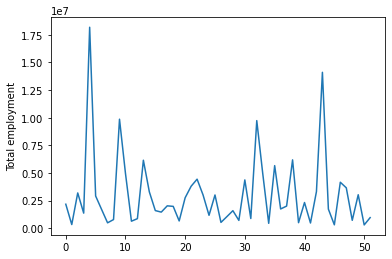

In [9]:
# lineplot of total employment by state index
sns.lineplot(x=employment.index, y='Total employment', data=employment)

In [10]:
population=pd.read_csv('US population by states.csv')

In [11]:
population.head()

,States,2020 Estimate Base,2020,2021,2022,2023
0,.Alabama,"5,024,294","5,031,864","5,050,380","5,073,903","5,108,468"
1,.Alaska,"733,374","732,964","734,923","733,276","733,406"
2,.Arizona,"7,157,902","7,186,683","7,272,487","7,365,684","7,431,344"
3,.Arkansas,"3,011,490","3,014,348","3,028,443","3,046,404","3,067,732"
4,.California,"39,538,212","39,503,200","39,145,060","39,040,616","38,965,193"


In [12]:
def remove(s):
    if '.' in s:
        s=s.replace('.','')
    return s
population['States']=population['States'].apply(remove)

In [13]:
def standardize2(s):
    if ',' in s:
        s=s.replace(',','')
    s=float(s)
    return s
population['2020 Estimate Base']=population['2020 Estimate Base'].apply(standardize2)
population['2020']=population['2020'].apply(standardize2)
population['2021']=population['2021'].apply(standardize2)
population['2022']=population['2022'].apply(standardize2)
population['2023']=population['2023'].apply(standardize2)

In [14]:
population.head()

,States,2020 Estimate Base,2020,2021,2022,2023
0,Alabama,5024294.0,5031864.0,5050380.0,5073903.0,5108468.0
1,Alaska,733374.0,732964.0,734923.0,733276.0,733406.0
2,Arizona,7157902.0,7186683.0,7272487.0,7365684.0,7431344.0
3,Arkansas,3011490.0,3014348.0,3028443.0,3046404.0,3067732.0
4,California,39538212.0,39503200.0,39145060.0,39040616.0,38965193.0


In [15]:
employment_rate=pd.DataFrame()
employment_rate['State']=employment['State']
employment_rate['Total employment']=employment['Total employment']/population['2023']

In [18]:
employment_rate.head()

,State,Total employment
0,Alabama,0.424628
1,Alaska,0.449819
2,Arizona,0.429169
3,Arkansas,0.444172
4,California,0.466588


<AxesSubplot:ylabel='Total employment'>

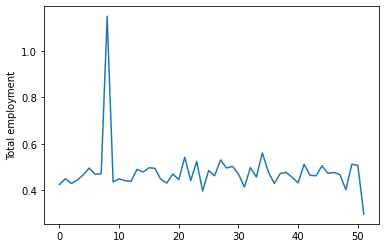

In [19]:
sns.lineplot(x=employment_rate.index, y='Total employment', data=employment_rate)